### 가설2 - 뇌졸중 발병 요인에 성별, 나이, 고혈압, BMI는 음의 상관관계가 있을 것이다.

In [23]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from glob import glob
import koreanize_matplotlib
import pingouin as pg
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

# 그래프에 retina display 적용
%config InlineBackend.figure_format = 'retina'

In [2]:
# 데이터 불러오기
url = "https://raw.githubusercontent.com/moksu27/midproject/main/healthcare-dataset-stroke-data.csv"
df = pd.read_csv(url)
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


## 데이터 전처리

In [3]:
age_list=[]
for age in df["age"]:
    if age >= 0 and age <10:
        age_list.append("10대 이전")
    elif age >= 10 and age <20:
        age_list.append("10대")
    elif age >= 20 and age <30:
        age_list.append("20대")
    elif age >= 30 and age <40:
        age_list.append("30대")
    elif age >= 40 and age <50:
        age_list.append("40대")
    elif age >= 50 and age <60:
        age_list.append("50대")
    elif age >= 60 and age <70:
        age_list.append("60대")
    elif age >= 70 and age <80:
        age_list.append("70대")
    elif age >= 80 and age <90:
        age_list.append("80대")
    
df["age_group"] = age_list

In [4]:
#결측치 확인
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
age_group              0
dtype: int64

## bmi 결측치 제거

In [5]:
fill_list = df["bmi"].dropna()
df1 = df["bmi"].fillna(pd.Series(np.random.choice(fill_list, size=len(df.index))))

In [8]:
df1.isnull().sum()

0

In [9]:
df["bmi"] = df1

In [11]:
df.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
age_group            0
dtype: int64

## 성별 Other 제거

In [12]:
df = df.loc[(df["gender"] == "Male") | (df["gender"] == "Female") ]
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,age_group
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1,60대
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,30.9,never smoked,1,60대
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1,80대
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1,40대
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1,70대


In [13]:
#Male 은 0, Female은 1 변경
df["gender"] = df["gender"].map({"Male" : 0, "Female" : 1})

/var/folders/k5/knpgq_1j4xg_p46vnk55j0gm0000gn/T/ipykernel_91871/2461377197.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["gender"] = df["gender"].map({"Male" : 0, "Female" : 1})


In [15]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,age_group
0,9046,0,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1,60대
1,51676,1,61.0,0,0,Yes,Self-employed,Rural,202.21,30.9,never smoked,1,60대
2,31112,0,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1,80대
3,60182,1,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1,40대
4,1665,1,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1,70대


In [25]:
df_sample = df[["stroke","gender","age","hypertension","bmi"]]

## Scaling

In [29]:
stroke_scale = df_sample.iloc[:, 1:]
stroke_scale.reset_index()
norm_scaler = MinMaxScaler()
stroke_scale = norm_scaler.fit_transform(stroke_scale.to_numpy())
stroke_scale = pd.DataFrame (stroke_scale, columns = ["gender","age","hypertension","bmi"])
stroke_scale.head()

,gender,age,hypertension,bmi
0,0.0,0.816895,0.0,0.301260
1,1.0,0.743652,0.0,0.235968
2,0.0,0.975586,0.0,0.254296
3,1.0,0.597168,0.0,0.276060
4,1.0,0.963379,1.0,0.156930


In [30]:
df_sample.iloc[:, 1:] = stroke_scale

/var/folders/k5/knpgq_1j4xg_p46vnk55j0gm0000gn/T/ipykernel_91871/3093550703.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sample.iloc[:, 1:] = stroke_scale


In [59]:
df_sample.head()

,index,stroke,gender,age,hypertension,bmi
0,105,1,0.0,0.707031,0.0,0.127148
1,211,1,1.0,0.621582,0.0,0.194731
2,77,1,1.0,0.963379,0.0,0.158076
3,37,1,1.0,0.877930,1.0,0.146621
4,132,1,0.0,0.841309,1.0,0.300115


In [32]:
df_sample.isnull().sum()

stroke          0
gender          1
age             1
hypertension    1
bmi             1
dtype: int64

In [34]:
x = df_sample.corr()
x.style.background_gradient(cmap = "rocket")

,stroke,gender,age,hypertension,bmi
stroke,1.000000,-0.009044,0.245228,0.127879,0.034699
gender,-0.009044,1.000000,0.028009,-0.021171,0.027033
age,0.245228,0.028009,1.000000,0.276335,0.320429
hypertension,0.127879,-0.021171,0.276335,1.000000,0.157007
bmi,0.034699,0.027033,0.320429,0.157007,1.000000


## Sampling

In [35]:
df_sample["stroke"].value_counts()

0    4860
1     249
Name: stroke, dtype: int64

In [36]:
class1 = df_sample.loc[(df_sample["stroke"]==1)]
class1.head()

,stroke,gender,age,hypertension,bmi
0,1,0.0,0.816895,0.0,0.301260
1,1,1.0,0.743652,0.0,0.235968
2,1,0.0,0.975586,0.0,0.254296
3,1,1.0,0.597168,0.0,0.276060
4,1,1.0,0.963379,1.0,0.156930


In [37]:
class0 = df_sample.loc[(df_sample["stroke"]==0)]
class0.head()

,stroke,gender,age,hypertension,bmi
249,0,0.0,0.035645,0.0,0.088202
250,0,0.0,0.707031,1.0,0.331042
251,0,1.0,0.096680,0.0,0.083620
252,0,1.0,0.853516,0.0,0.293242
253,0,0.0,0.169922,0.0,0.100802


# oversampling

In [60]:
class1_over = class1.sample(df_sample["stroke"].value_counts()[0], replace=True)
test_over = pd.concat([class1_over, class0], axis=0)
test_over.shape

(9720, 5)

In [39]:
test_over["stroke"].value_counts()

1    4860
0    4860
Name: stroke, dtype: int64

In [40]:
df_sample = test_over.copy().reset_index()
df_sample.head()

,index,stroke,gender,age,hypertension,bmi
0,105,1,0.0,0.707031,0.0,0.127148
1,211,1,1.0,0.621582,0.0,0.194731
2,77,1,1.0,0.963379,0.0,0.158076
3,37,1,1.0,0.877930,1.0,0.146621
4,132,1,0.0,0.841309,1.0,0.300115


## 상관계수 구하기

In [43]:
mask = np.triu(np.ones_like(df_sample.corr()))

<AxesSubplot: >

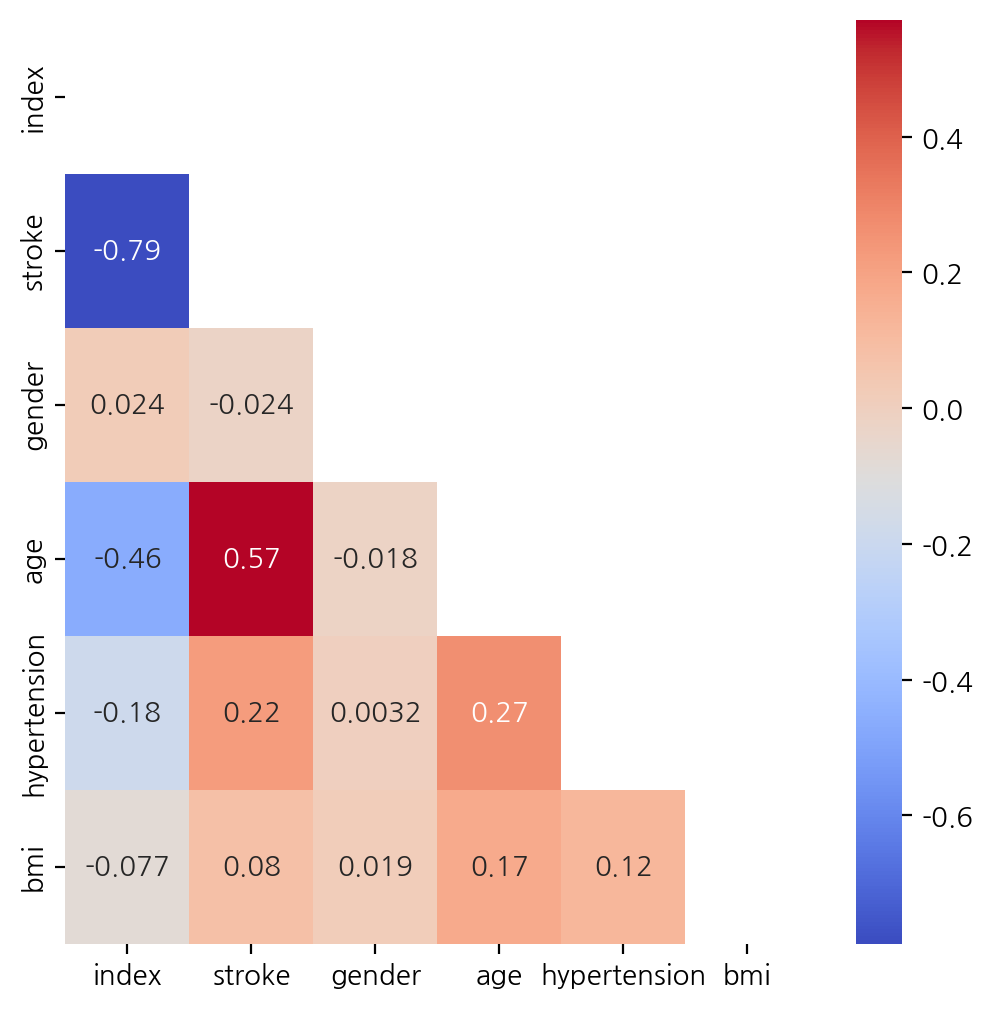

In [45]:
plt.figure(figsize=(6,6))
sns.heatmap(df_sample.corr(),annot=True,cmap="coolwarm", mask=mask)

## 데이터 시각화

<AxesSubplot: xlabel='gender', ylabel='stroke'>

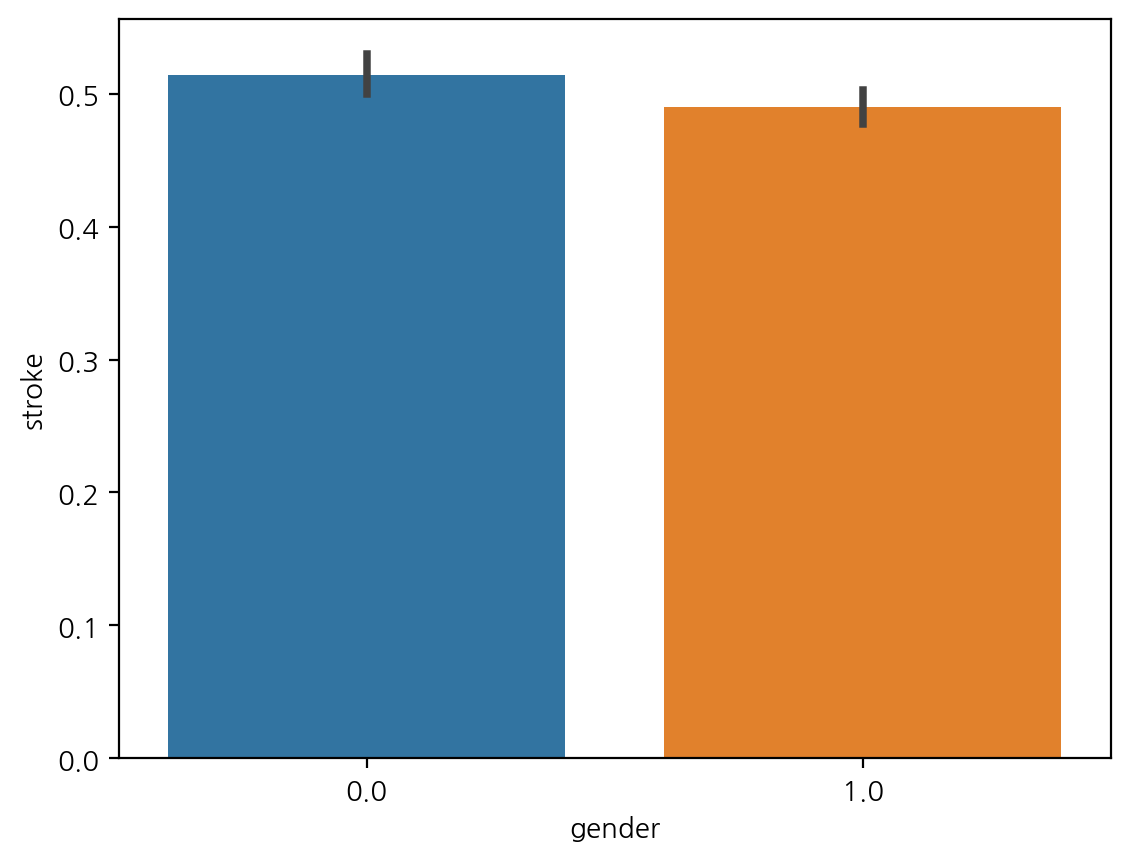

In [52]:
sns.barplot(data = df_sample, x = "gender", y="stroke")

<AxesSubplot: xlabel='age', ylabel='Count'>

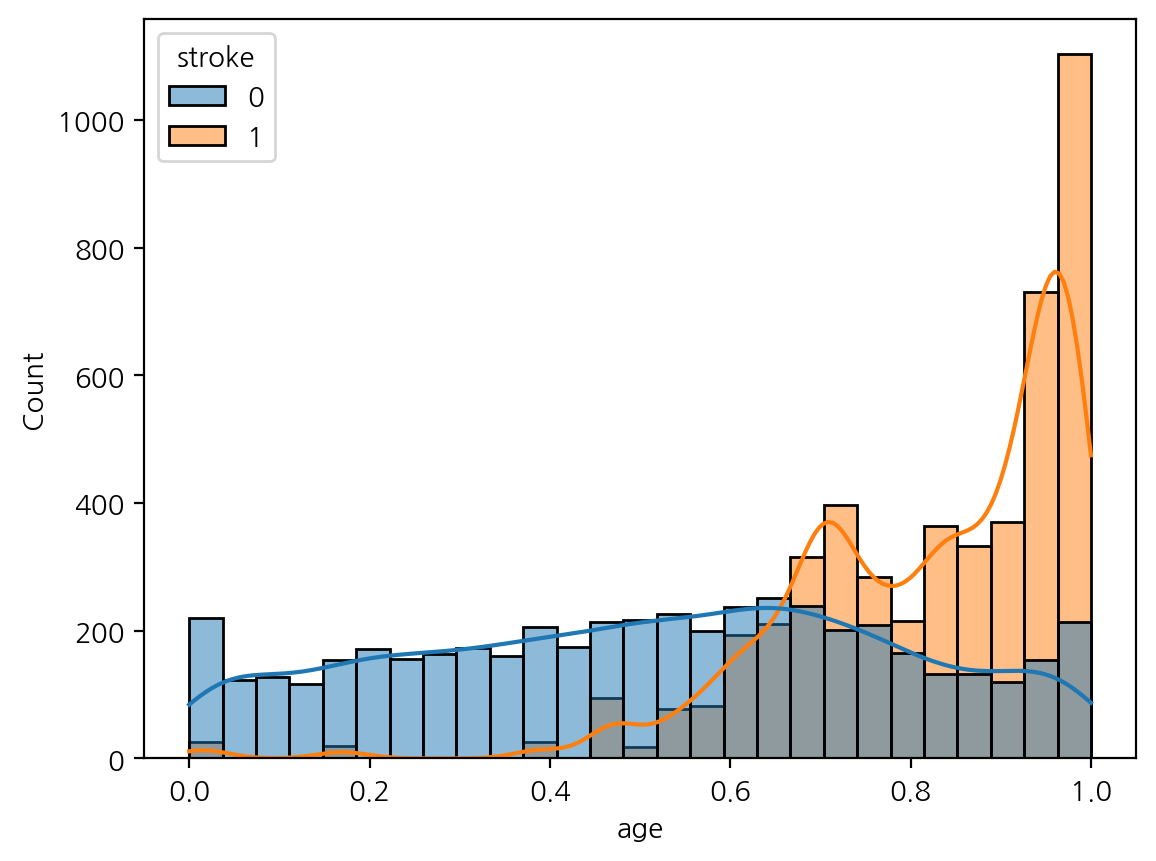

In [53]:
sns.histplot(data = df_sample, x ="age", hue = "stroke", kde = True)

<AxesSubplot: xlabel='bmi', ylabel='Count'>

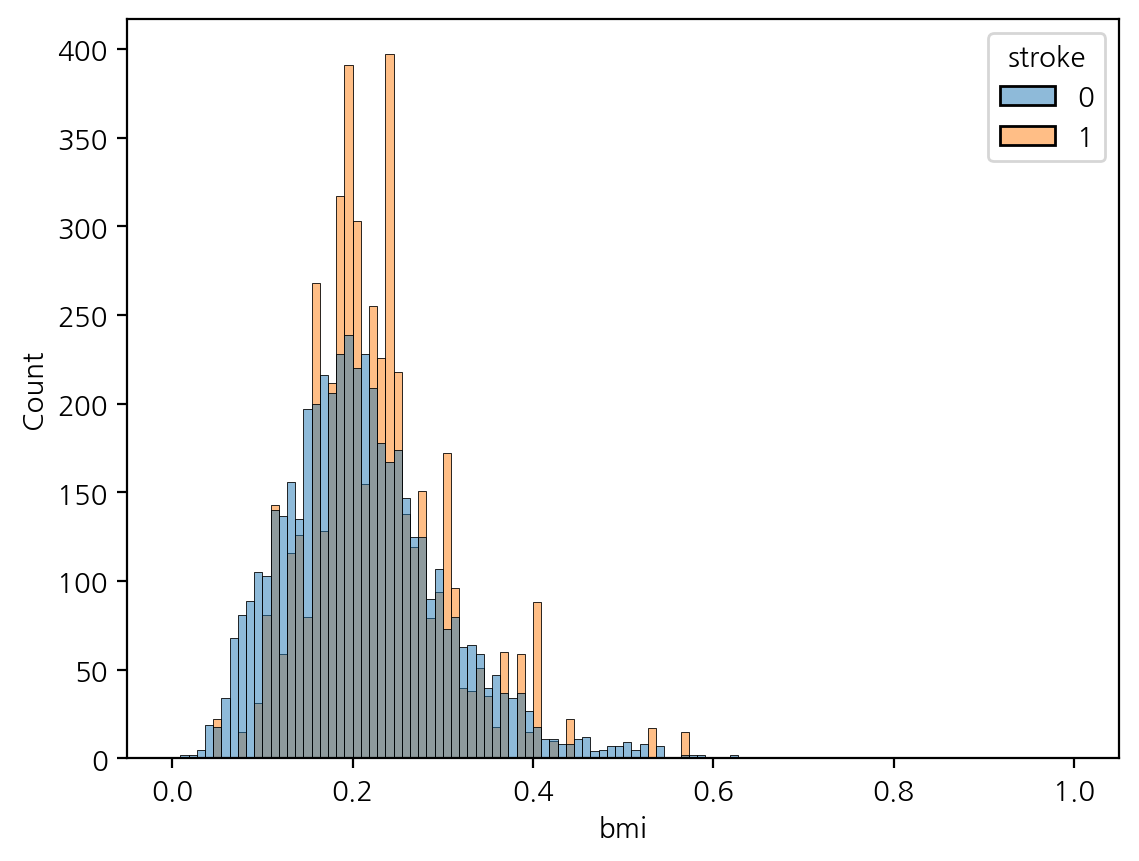

In [54]:
sns.histplot(data = df_sample , x = "bmi" , hue = "stroke")

<AxesSubplot: xlabel='bmi', ylabel='Density'>

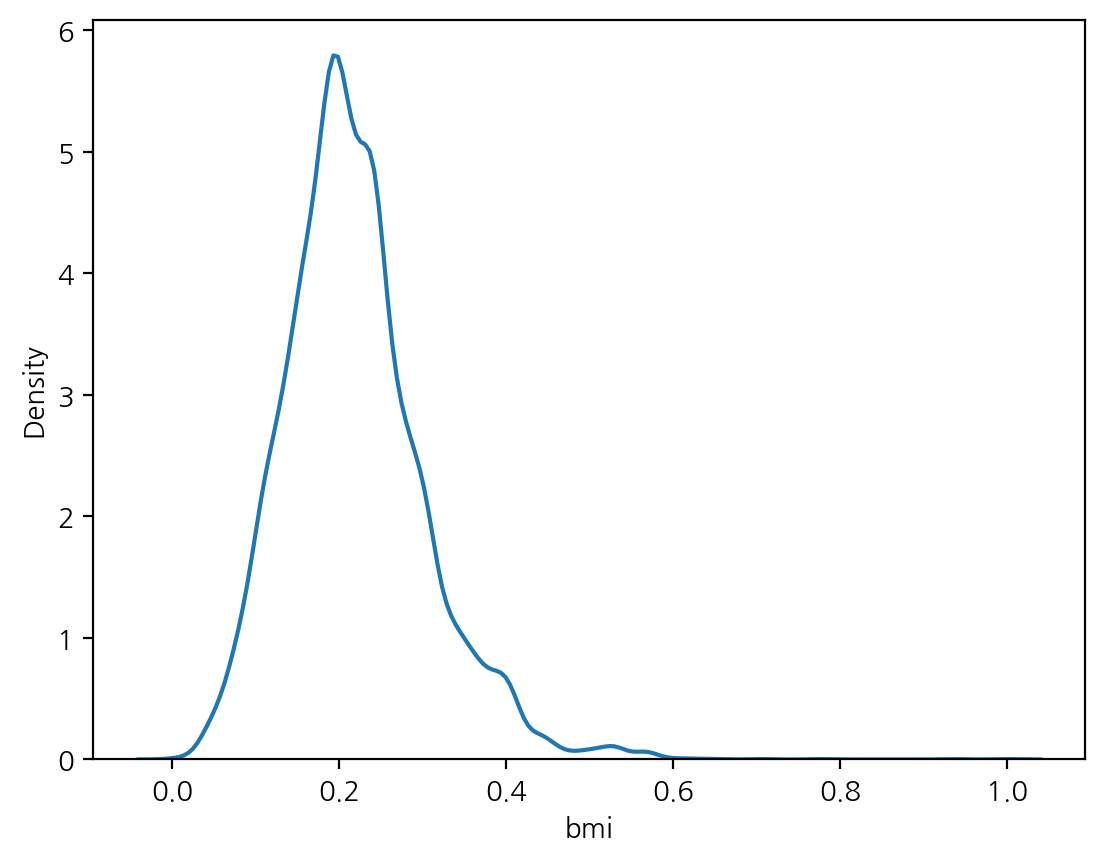

In [55]:
sns.kdeplot(data = df_sample, x = "bmi")

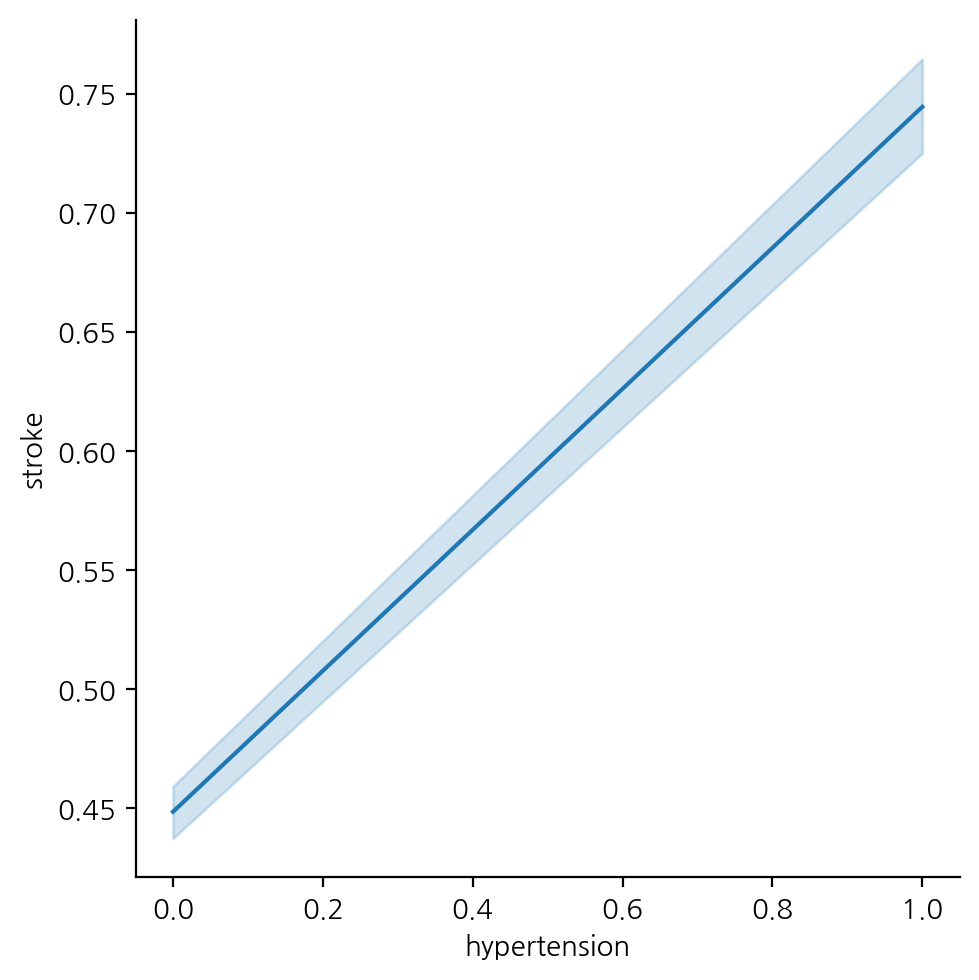

In [56]:
sns.relplot(data = df_sample, x = "hypertension", y = "stroke", kind = "line")

<AxesSubplot: xlabel='hypertension', ylabel='stroke'>

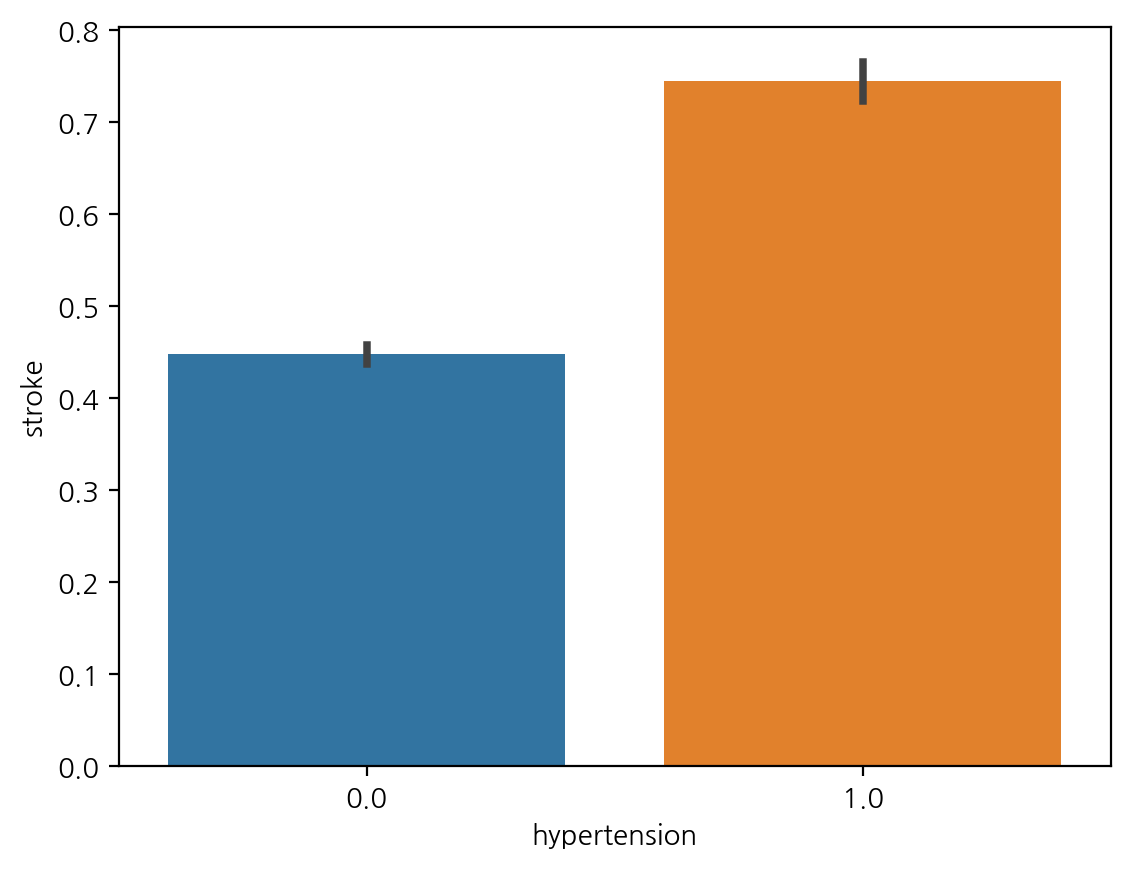

In [57]:
sns.barplot(data = df_sample, x = "hypertension", y = "stroke")

## 결론

<AxesSubplot: >

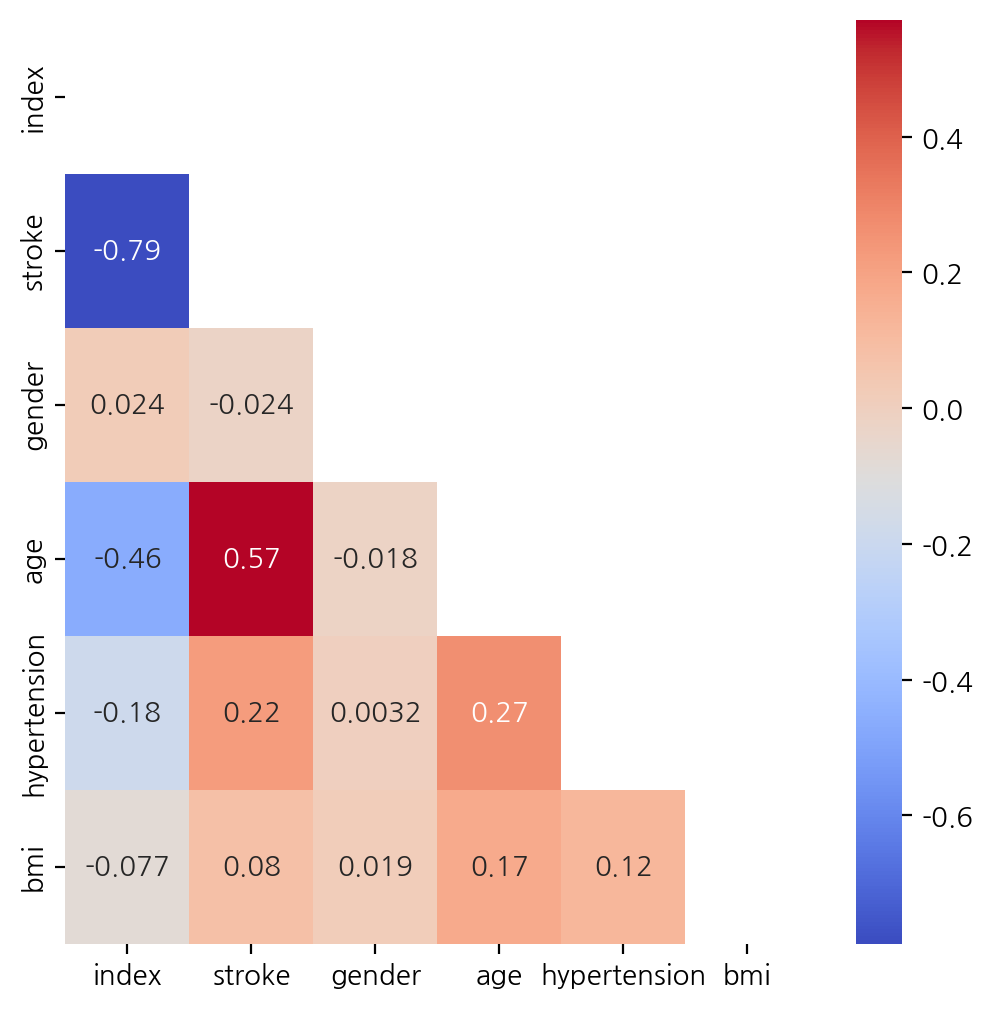

In [58]:
plt.figure(figsize=(6,6))
sns.heatmap(df_sample.corr(),annot=True,cmap="coolwarm", mask=mask)

전처리된 데이터를 통한 상관관계 분석 결과 bmi와 성별은 뇌졸중과 관련이 없으며 고혈압은 약한 양적 선형관계, 나이는 뚜렷한 양적 선형관계를 나타내고 있다.